# Adaptive Linear Neuron with Gradient Descent

#### Notes

- weights are updated after calculating the gradient based on the whole training dataset, not individual samples. This is known as **Batch Gradient Descent**

In [2]:
import numpy as np
class AdalineGD(object):
    """ADAptive LInear NEuron classifier
    
    Parameters
    ----------
    eta : float
        learning rate (0.0, 1.0)
    n_iter : int
        passes over the dataset
    random_state : int
        random number generator seed for random weight initialization
        
    Attributes
    ----------
    w_ : 1d-array
        weights after fitting
    cost_ : list
        sum-of-squares cost function value in each epoch
        
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors,
                n_samples is the number of samples 
                n_features is the number of featues
        y : array-like, shape = [n_samples]
            target values (classes)
        
        Returns
        -------
        self : object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale = 0.01, 
                              size=1+X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""""
        # dot product of weights and inputs with threshold tacked on
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Compute linear activation"""
        # identity in this case
        return X
    
    def predict(self, X):
        """Returns class label after unit step"""
        return np.where(self.activation(self.net_input(X)) > 0.0, 1, -1)
    

In [3]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

y = df.iloc[0:100, 4]
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0,2]].values

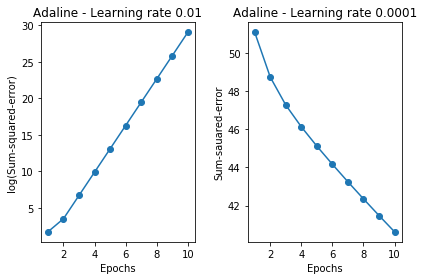

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2)

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X,y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker = 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-sauared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.tight_layout()
plt.show()


#### Left Figure
The learning rate was too high, thus the cost function was not minimized and the error becomes larger each epoch. The global minimum has been overshot

#### Right Figure
The learning rate was too low and never converged, it would take a lot of training for this model to converge to the global cost minimum.